In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
model = tf.keras.models.load_model('model.h5')
model.summary();

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        1

conv2d (3, 3, 1, 32)
32


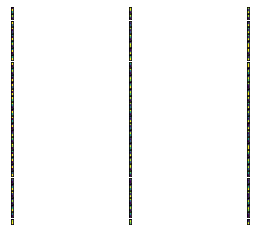

conv2d_1 (3, 3, 32, 32)
32


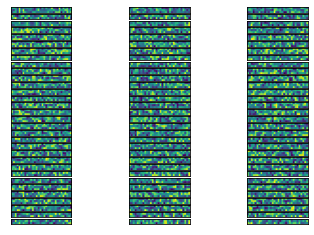

conv2d_2 (3, 3, 32, 64)
64


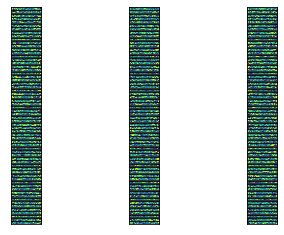

conv2d_3 (3, 3, 64, 64)
64


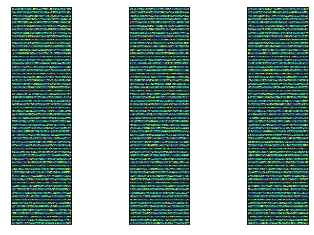

In [3]:
for layer in model.layers:
      if 'conv' in layer.name:
        weights, bias= layer.get_weights()
        
        f_min, f_max = weights.min(), weights.max()
        
        filters = (weights - f_min) / (f_max - f_min)  
        print(layer.name, filters.shape)

        print(filters.shape[3])
        filter_cnt=1
        
        for i in range(filters.shape[3]):
            filt=filters[:,:,:, i]
            for j in range(filters.shape[0]):
                ax= plt.subplot(filters.shape[3], filters.shape[0], filter_cnt  )
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(filt[:, j])
                filter_cnt+=1
        plt.show()

(1, 222, 222, 32)
(1, 111, 111, 32)
(1, 109, 109, 32)
(1, 109, 109, 32)
(1, 54, 54, 32)
(1, 52, 52, 64)


<ipython-input-5-35a64b11d795>:35: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()
<ipython-input-5-35a64b11d795>:35: RuntimeWarning: divide by zero encountered in true_divide
  x /= x.std ()


(1, 52, 52, 64)
(1, 26, 26, 64)
(1, 24, 24, 64)
(1, 24, 24, 64)
(1, 12, 12, 64)
(1, 9216)
(1, 64)
(1, 1)
(1, 1)


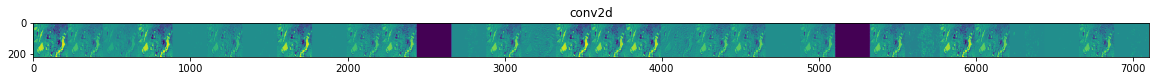

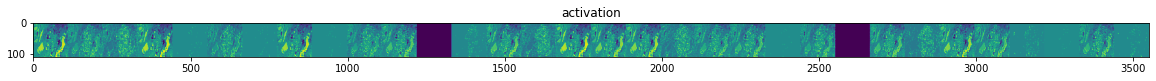

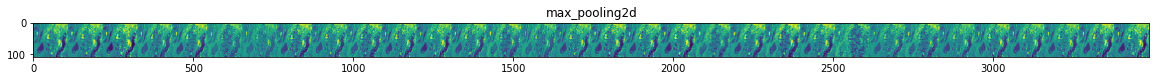

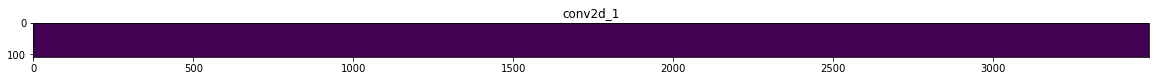

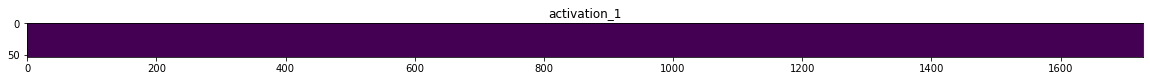

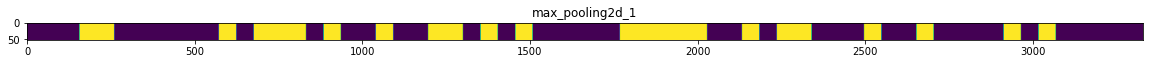

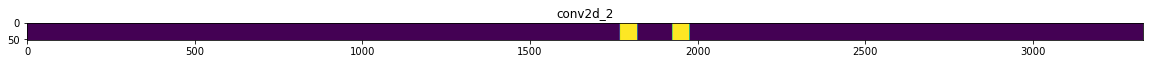

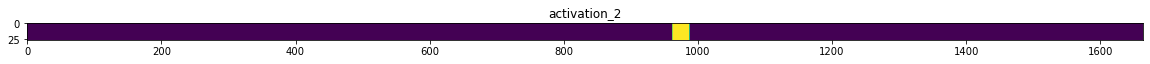

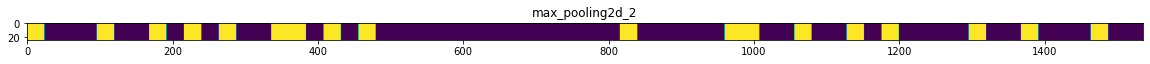

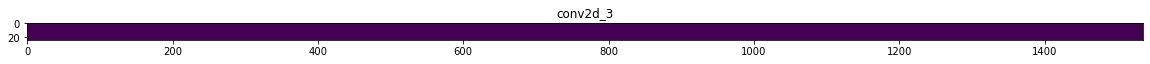

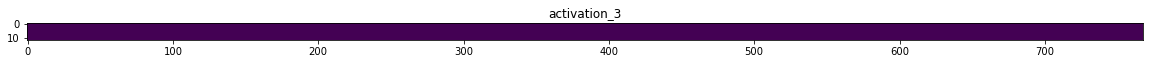

In [5]:
img_path = "Test/Benign/SOB_B_A-14-22549AB-40-001.png"

successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(224, 224))
# Convert ht image to Array of dimension (150,150,3)
img= cv2.imread(img_path,0)
img = cv2.resize(img,(224,224))

x   = np.array(img).reshape(-1,224,20,1)
# Rescale by 1/255
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [ ]:
img_path = "test/normal-0.jpg"

successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
#Load the input image
img = load_img(img_path, target_size=(200, 200))
# Convert ht image to Array of dimension (150,150,3)
x   = img_to_array(img)                           
x   = np.array(img).reshape(-1,200,200,1)
# Rescale by 1/255
x /= 255.0
# Let's run input image through our vislauization network
# to obtain all intermediate representations for the image.
successive_feature_maps = visualization_model.predict(x)
# Retrieve are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  print(feature_map.shape)
  if len(feature_map.shape) == 4:
    
    # Plot Feature maps for the conv / maxpool layers, not the fully-connected layers
   
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    # Postprocess the feature to be visually palatable
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      # Tile each filter into a horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
# Display the grid
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' )